In [6]:
X = [1,5,9,0] 
Y = [3,0,2,9]

intersection = [x for x in X if x in Y]
intersection

[9, 0]

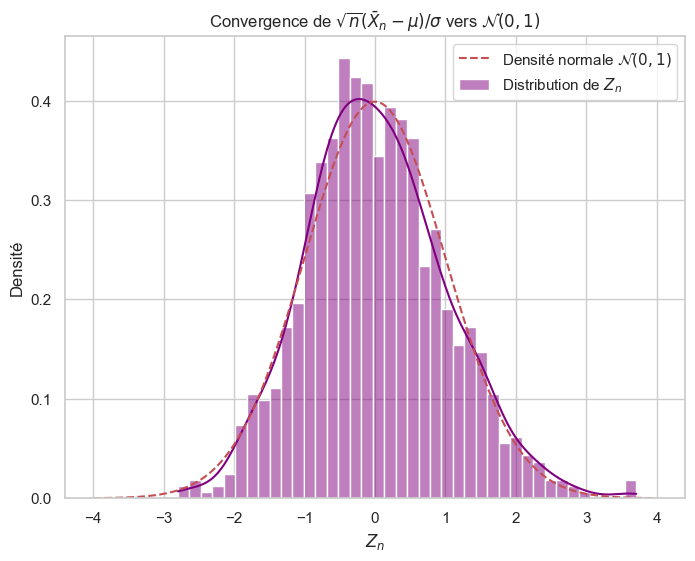

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set(style="whitegrid")

# Population : distribution exponentielle (non normale)
population = np.random.exponential(scale=2, size=100000)
mu = np.mean(population)        # moyenne vraie de la population
sigma = np.std(population)      # écart-type de la population

n = 50       # taille de l'échantillon
num_samples = 1000  # nombre d'échantillons

Z_n = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=n)
    x_bar = np.mean(sample)
    # calcul de sqrt(n) * (x_bar - mu) / sigma
    z = np.sqrt(n) * (x_bar - mu) / sigma
    Z_n.append(z)

# Visualisation
plt.figure(figsize=(8, 6))
sns.histplot(Z_n, bins=40, kde=True, color='purple', stat="density", label='Distribution de $Z_n$')

# Ajouter la densité normale standard pour comparaison
x = np.linspace(-4, 4, 200)
plt.plot(x, norm.pdf(x), 'r--', label='Densité normale $\mathcal{N}(0,1)$')

plt.title(r"Convergence de $\sqrt{n}(\bar{X}_n - \mu)/\sigma$ vers $\mathcal{N}(0,1)$")
plt.xlabel("$Z_n$")
plt.ylabel("Densité")
plt.legend()
plt.show()


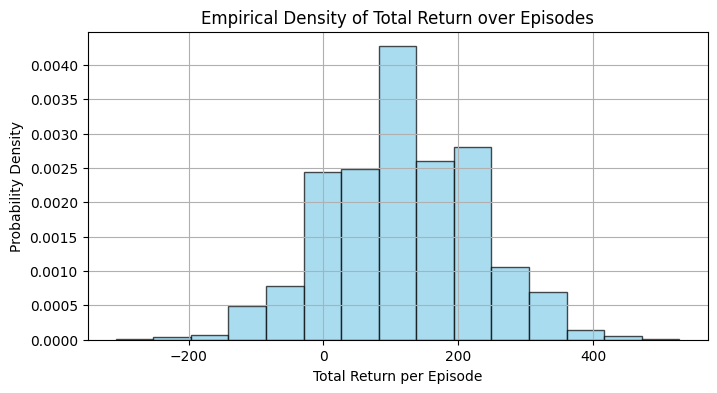

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

def probability():
    if np.random.random()<=.6:
        return +10
    else:
        return -12

T = 100
nb_episodes = 10_000
expected_return = []

for ep in range(nb_episodes):
    total_return = 0
    for t in range(1, T):
        r = probability()
        total_return += r
    expected_return.append(total_return)


plt.figure(figsize=(8, 4))
plt.hist(expected_return, bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel("Total Return per Episode")
plt.ylabel("Probability Density")
plt.title("Empirical Density of Total Return over Episodes")
plt.grid(True)
plt.show()